In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
os.getcwd()
path = '/home/julien/Documents/Projects/datasets/boston_housing'
os.chdir(path)
print(os.getcwd())

/home/julien/Documents/Projects/datasets/boston_housing


In [4]:
filename = 'housing.csv'
df = pd.read_csv(filename, 
                 delim_whitespace=True,
                 header = None)

In [5]:
from boston_housing.show_NAs import show_NAs

In [6]:
show_NAs(df)

,NAs


### Munging Pipeline

In [7]:
#Checking for missing data
def show_NAs(dataf):
    NAs = pd.concat([dataf.isnull().sum()], axis=1, keys=['NAs'])
    return NAs[NAs.sum(axis=1) > 0]

In [8]:
# Start pipeline
def start_pipeline(dataf):
    dataf = dataf.copy()
    return dataf

# Rename columns
#  - CRIM     per capita crime rate by town
#  - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  - INDUS    proportion of non-retail business acres per town
#  - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  - NOX      nitric oxides concentration (parts per 10 million)
#  - RM       average number of rooms per dwelling
#  - AGE      proportion of owner-occupied units built prior to 1940
#  - DIS      weighted distances to five Boston employment centres
#  - RAD      index of accessibility to radial highways
#  - TAX      full-value property-tax rate per $10,000
#  - PTRATIO  pupil-teacher ratio by town
#  - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town = is this black people??!!
#  - LSTAT    % lower status of the population
#  - MEDV     Median value of owner-occupied homes in $1000's
def rename_cols(dataf):
    dataf = dataf.rename(columns={0:'crim',
                                  1: 'res_zone',
                                  2: 'indus',
                                  3: 'river',
                                  4: 'nox',
                                  5: 'rooms',
                                  6: 'age',
                                  7: 'distance',
                                  8: 'highways',
                                  9: 'tax',
                                  10:'pupil_ratio',
                                  11:'blacks',
                                  12:'lstats',
                                  13:'medv'}
                                  
                        )
    return dataf

def by_the_river(dataf):
    river_dict = {0: 'Not_by_river',
                  1: 'By_river'}
    dataf['river'] = dataf['river'].map(river_dict)
    dataf['river'] = pd.Categorical(dataf['river'])
    return dataf

In [9]:
df_clean = (df
.pipe(start_pipeline)
.pipe(rename_cols)
.pipe(by_the_river)
           )

In [10]:
df_clean.to_csv('boston_clean.csv')

In [11]:
pwd

'/home/julien/Documents/Projects/datasets/boston_housing'

In [12]:
show_NAs(df_clean)

,NAs


In [13]:
df_clean.describe()

,crim,res_zone,indus,nox,rooms,age,distance,highways,tax,pupil_ratio,blacks,lstats,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


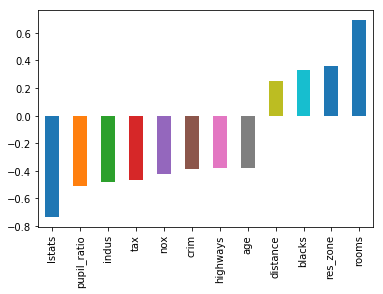

In [14]:
(df_clean
.corr()['medv'].drop(index='medv')
.sort_values()
.plot(kind='bar')
)

In [15]:
corr = df_clean.corr().abs()#.sort_values(by='crim')
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,crim,res_zone,indus,nox,rooms,age,distance,highways,tax,pupil_ratio,blacks,lstats,medv
crim,1,0.200469,0.406583,0.420972,0.219247,0.352734,0.37967,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
res_zone,0.200469,1,0.533828,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.17552,0.412995,0.360445
indus,0.406583,0.533828,1,0.763651,0.391676,0.644779,0.708027,0.595129,0.72076,0.383248,0.356977,0.6038,0.483725
nox,0.420972,0.516604,0.763651,1,0.302188,0.73147,0.76923,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
rooms,0.219247,0.311991,0.391676,0.302188,1,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.69536
age,0.352734,0.569537,0.644779,0.73147,0.240265,1,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
distance,0.37967,0.664408,0.708027,0.76923,0.205246,0.747881,1,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
highways,0.625505,0.311948,0.595129,0.611441,0.209847,0.456022,0.494588,1,0.910228,0.464741,0.444413,0.488676,0.381626
tax,0.582764,0.314563,0.72076,0.668023,0.292048,0.506456,0.534432,0.910228,1,0.460853,0.441808,0.543993,0.468536
pupil_ratio,0.289946,0.391679,0.383248,0.188933,0.355501,0.261515,0.232471,0.464741,0.460853,1,0.177383,0.374044,0.507787


In [16]:
import plotnine as p9

In [17]:
df_clean.columns

Index(['crim', 'res_zone', 'indus', 'river', 'nox', 'rooms', 'age', 'distance',
       'highways', 'tax', 'pupil_ratio', 'blacks', 'lstats', 'medv'],
      dtype='object')

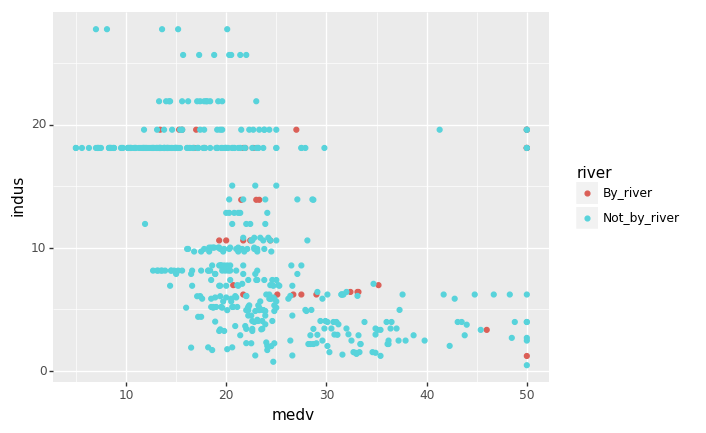

<ggplot: (8789015326565)>

In [18]:
(p9.ggplot(data=df_clean, 
           mapping=p9.aes(x='medv', 
                          y='indus',
                          color='river')) 
 + p9.geom_point()
)

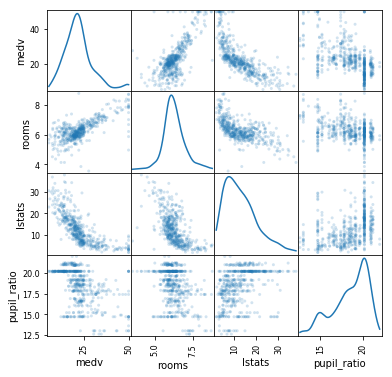

In [19]:
pd.plotting.scatter_matrix(df_clean[['medv', 'rooms','lstats', 'pupil_ratio']], alpha=0.2, figsize=(6, 6), diagonal='kde');

In [20]:
# I take the asbolute to spot better the features correlated with medv
# Im gonna focus on lstats & rooms for now, although there is some correlation (0.61)

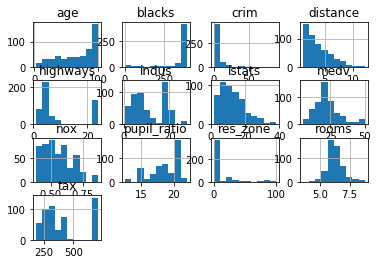

In [21]:
df_clean.hist();

In [22]:
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, Ridge

In [23]:
lr = LinearRegression(fit_intercept=True, 
                      normalize=False, 
                      copy_X=True, 
                      n_jobs=None)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
X = df_clean[['rooms', 'lstats', 'pupil_ratio']]
y = df_clean['medv']
X.head()

,rooms,lstats,pupil_ratio
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [28]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(X)
X = scaler.transform(X)

In [29]:
X

array([[ 0.41367189, -1.0755623 , -1.45900038],
       [ 0.19427445, -0.49243937, -0.30309415],
       [ 1.28271368, -1.2087274 , -0.30309415],
       ...,
       [ 0.98496002, -0.98304761,  1.17646583],
       [ 0.72567214, -0.86530163,  1.17646583],
       [-0.36276709, -0.66905833,  1.17646583]])

In [26]:

[X_train, X_test, y_train, y_test] = train_test_split(X, y, random_state=42, test_size=0.3)

In [27]:
lr.fit(X_train, y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score

In [29]:

rmse = (np.sqrt(mean_squared_error(y_train, lr.predict(X_train))))
r2 = r2_score(y_train, lr.predict(X_train))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE = residuals is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE = residuals is 5.261867032464956
R2 score is 0.6850018441906278




In [30]:
y_pred = lr.predict(X_test)

In [31]:
rmse = (np.sqrt(mean_squared_error(y_test, lr.predict(X_test))))
r2 = r2_score(y_test, lr.predict(X_test))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE = residuals is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE = residuals is 5.100216850500208
R2 score is 0.650904156861472




In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [33]:
lasr = Lasso(alpha=1.0, fit_intercept=True, normalize=False)

In [34]:
lasr.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
rmse = (np.sqrt(mean_squared_error(y_test, lasr.predict(X_test))))
r2 = r2_score(y_test, lasr.predict(X_test))

print("The model performance for training set")
print("--------------------------------------")
print('RMSE = residuals is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE = residuals is 5.181999250205775
R2 score is 0.6396188344547409




In [36]:
ridge = Ridge()

In [37]:
ridge.fit(X = X_train, y= y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
y_pred = ridge.predict(X_test)

In [39]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE = residuals is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE = residuals is 5.098861885426568
R2 score is 0.6510896195021685




In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

In [59]:
models = {}
models['Linear Regression'] = LinearRegression()
models['Ridge Regression'] = Ridge()
models['Lasso Regression'] = Lasso()
models['Ada Boost'] = AdaBoostRegressor()
models['Extra Trees'] = ExtraTreesRegressor(n_estimators=10)
models['Random Forest'] = RandomForestRegressor(n_estimators=10)
models['Decision Tree'] = DecisionTreeRegressor()

In [60]:
seed = 42
folds = 10

model_results = []
model_names = []

for iModel in models:
    curr_mod = models[iModel]
    k_fold = KFold(n_splits=folds, shuffle=False, random_state=seed)
    results = cross_val_score(curr_mod, 
                              X_train, 
                              y_train, 
                              cv=k_fold, 
                              scoring="neg_mean_squared_error"
                             )
    
    model_results.append(results)
    model_names.append(curr_mod)
    print("{}: {}, {}".format(curr_mod, round(results.mean(), 3), round(results.std(), 3)))
    

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False): -29.285, 10.476
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001): -29.277, 10.458
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False): -30.812, 8.924
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None): -17.976, 7.82
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False): -18.18, 9.309
RandomForest

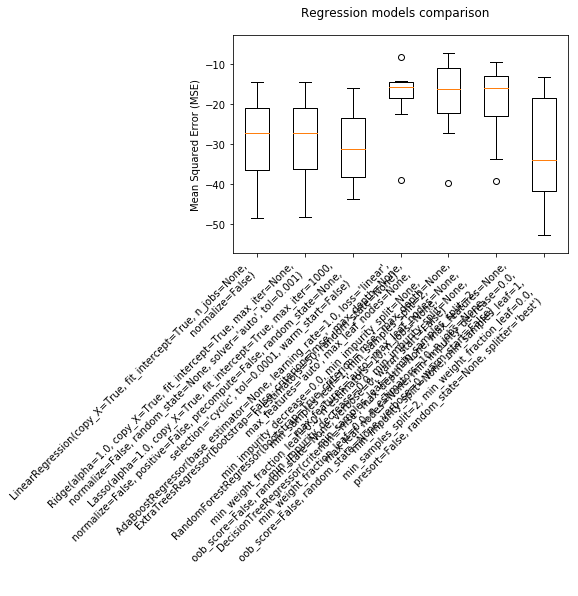

In [61]:

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
#plt.savefig("model_mse_scores.png")
#plt.clf()
plt.show()